In [147]:
import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as sm
import seaborn as sns
from scipy.stats import boxcox , shapiro
%matplotlib inline

In [81]:
model_df = pd.read_csv(os.path.join('data','model'))

In [82]:
model_df.columns

Index(['Unnamed: 0', 'Score', 'NoUsersRating', 'MetaScore', 'NoReviews-Users',
       'NoReviews-Crit', 'OpeningWE(USA)($)', 'Gross(USA)($)',
       'CumulativeWorldWide Gross($)', 'Year', 'NoSeriesNextYear'],
      dtype='object')

In [83]:
model_df.rename(columns={'Score': 'X1',
                         'NoUsersRating' : 'X2', 
                         'MetaScore':'X3', 
                         'NoReviews-Users':'X4',
                         'NoReviews-Crit':'X5',
                         'OpeningWE(USA)($)':'X6', 
                         'Gross(USA)($)':'X7',
                         'CumulativeWorldWide Gross($)':'X8', 
                         'NoSeriesNextYear':'Y'}, inplace=True)

In [84]:
model_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,Year,Y
0,0,0.73,140117.0,86.0,517.0,176.0,7465343.0,134218018.0,166200000.0,1978,17
1,2,0.65,42635.0,68.5,260.0,106.0,3934030.0,27107960.0,27107960.0,1980,11
2,205,0.65,42635.0,68.5,260.0,106.0,3934030.0,27107960.0,27107960.0,1980,11
3,1,0.61,1139.0,68.5,16.0,10.0,19828687.0,15934737.0,15934737.0,1980,11
4,3,0.68,85553.0,87.0,277.0,127.0,14100523.0,108185706.0,108185706.0,1981,8


In [85]:
model_df = model_df[['Y','X1','X2','X3','X4','X5','X6','X7','X8']].copy()

In [86]:
model_df.to_csv(os.path.join('data','linear_regression_model'))

In [87]:
model_df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8
0,17,0.73,140117.0,86.0,517.0,176.0,7465343.0,134218018.0,166200000.0
1,11,0.65,42635.0,68.5,260.0,106.0,3934030.0,27107960.0,27107960.0
2,11,0.65,42635.0,68.5,260.0,106.0,3934030.0,27107960.0,27107960.0
3,11,0.61,1139.0,68.5,16.0,10.0,19828687.0,15934737.0,15934737.0
4,8,0.68,85553.0,87.0,277.0,127.0,14100523.0,108185706.0,108185706.0


In [88]:
model_df.corr()

,Y,X1,X2,X3,X4,X5,X6,X7,X8
Y,1.000000,0.224230,0.371854,0.032536,0.239764,0.564566,0.403338,0.356351,0.454549
X1,0.224230,1.000000,0.611327,0.247032,0.450535,0.594515,0.476737,0.570326,0.547111
X2,0.371854,0.611327,1.000000,0.233274,0.842749,0.813557,0.765642,0.811705,0.779145
X3,0.032536,0.247032,0.233274,1.000000,0.179863,0.179998,0.133327,0.228476,0.179392
X4,0.239764,0.450535,0.842749,0.179863,1.000000,0.723009,0.718877,0.736126,0.676145
X5,0.564566,0.594515,0.813557,0.179998,0.723009,1.000000,0.810068,0.803794,0.823188
X6,0.403338,0.476737,0.765642,0.133327,0.718877,0.810068,1.000000,0.948090,0.946087
X7,0.356351,0.570326,0.811705,0.228476,0.736126,0.803794,0.948090,1.000000,0.962766
X8,0.454549,0.547111,0.779145,0.179392,0.676145,0.823188,0.946087,0.962766,1.000000


In [89]:
sns.pairplot(model_df,size = 1.2, aspect=1.5)

In [219]:
result = sm.ols(formula="Y ~ X1 + X2 + X3 + X4 + X5 + X6+ X7 + X8 +1", data=model_df).fit()

In [221]:
result.params

Intercept    3.847306e+01
X1          -2.014724e+01
X2           1.063304e-05
X3           2.123084e-03
X4          -7.234460e-03
X5           7.261287e-02
X6          -1.714963e-08
X7          -1.472451e-07
X8           5.838944e-08
dtype: float64

In [222]:
result.summary()

<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>            <td>Y</td>        <th>  R-squared:         </th> <td>   0.450</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.428</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   19.98</td>
</tr>
<tr>
  <th>Date:</th>             <td>Thu, 26 Apr 2018</td> <th>  Prob (F-statistic):</th> <td>6.95e-22</td>
</tr>
<tr>
  <th>Time:</th>                 <td>14:38:21</td>     <th>  Log-Likelihood:    </th> <td> -828.00</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   204</td>      <th>  AIC:               </th> <td>   1674.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   195</td>      <th>  BIC:               </th> <td>   1704.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>     8</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Intercept</th> <td>   38.4731</td> <td>   16.051</td> <td>    2.397</td> <td> 0.017</td> <td>    6.817</td> <td>   70.130</td>
</tr>
<tr>
  <th>X1</th>        <td>  -20.1472</td> <td>   10.513</td> <td>   -1.916</td> <td> 0.057</td> <td>  -40.881</td> <td>    0.587</td>
</tr>
<tr>
  <th>X2</th>        <td> 1.063e-05</td> <td> 9.46e-06</td> <td>    1.124</td> <td> 0.262</td> <td>-8.02e-06</td> <td> 2.93e-05</td>
</tr>
<tr>
  <th>X3</th>        <td>    0.0021</td> <td>    0.225</td> <td>    0.009</td> <td> 0.992</td> <td>   -0.441</td> <td>    0.445</td>
</tr>
<tr>
  <th>X4</th>        <td>   -0.0072</td> <td>    0.003</td> <td>   -2.468</td> <td> 0.014</td> <td>   -0.013</td> <td>   -0.001</td>
</tr>
<tr>
  <th>X5</th>        <td>    0.0726</td> <td>    0.011</td> <td>    6.574</td> <td> 0.000</td> <td>    0.051</td> <td>    0.094</td>
</tr>
<tr>
  <th>X6</th>        <td>-1.715e-08</td> <td> 8.81e-08</td> <td>   -0.195</td> <td> 0.846</td> <td>-1.91e-07</td> <td> 1.57e-07</td>
</tr>
<tr>
  <th>X7</th>        <td>-1.472e-07</td> <td> 3.98e-08</td> <td>   -3.703</td> <td> 0.000</td> <td>-2.26e-07</td> <td>-6.88e-08</td>
</tr>
<tr>
  <th>X8</th>        <td> 5.839e-08</td> <td> 1.48e-08</td> <td>    3.941</td> <td> 0.000</td> <td> 2.92e-08</td> <td> 8.76e-08</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td>32.300</td> <th>  Durbin-Watson:     </th> <td>   0.955</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.000</td> <th>  Jarque-Bera (JB):  </th> <td>  43.927</td>
</tr>
<tr>
  <th>Skew:</th>          <td> 0.973</td> <th>  Prob(JB):          </th> <td>2.89e-10</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 4.176</td> <th>  Cond. No.          </th> <td>6.74e+09</td>
</tr>
</table>

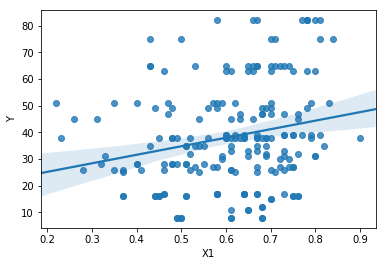

In [93]:
sns.regplot(model_df.X1, model_df.Y)

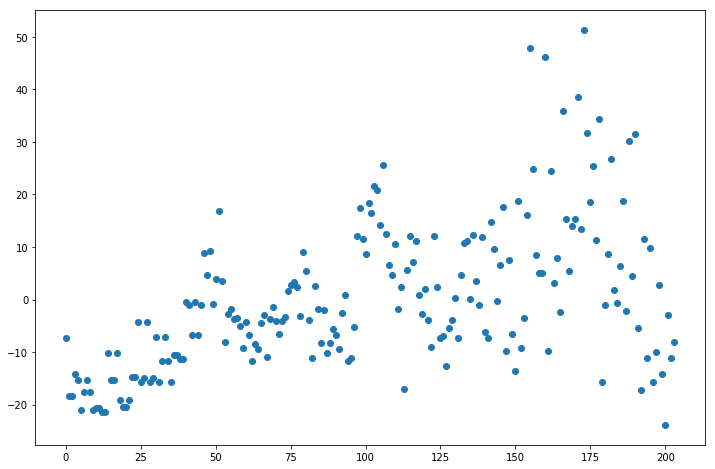

In [94]:
result.resid.plot(style='o', figsize=(12,8));

In [95]:
result2 = sm.ols(formula="Y ~ X1 + X2 + X3 + X4 + X5 + X6+ X7 + X8 + X2*X3+ X3*X4+ X4*X5 + X5*X6"
                        , data=model_df).fit()

In [96]:
result2.params

Intercept    6.356977e+01
X1          -1.811584e+01
X2          -1.334449e-04
X3          -3.737643e-01
X4           1.064066e-02
X5           7.800488e-02
X6           9.673844e-08
X7          -1.440758e-07
X8           6.317251e-08
X2:X3        1.941661e-06
X3:X4       -4.105471e-04
X4:X5        2.234687e-05
X5:X6       -3.009493e-10
dtype: float64

In [97]:
result2.summary()

<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>            <td>Y</td>        <th>  R-squared:         </th> <td>   0.472</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.439</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   14.22</td>
</tr>
<tr>
  <th>Date:</th>             <td>Thu, 26 Apr 2018</td> <th>  Prob (F-statistic):</th> <td>6.33e-21</td>
</tr>
<tr>
  <th>Time:</th>                 <td>12:13:59</td>     <th>  Log-Likelihood:    </th> <td> -823.94</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   204</td>      <th>  AIC:               </th> <td>   1674.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   191</td>      <th>  BIC:               </th> <td>   1717.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>    12</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Intercept</th> <td>   63.5698</td> <td>   21.859</td> <td>    2.908</td> <td> 0.004</td> <td>   20.455</td> <td>  106.685</td>
</tr>
<tr>
  <th>X1</th>        <td>  -18.1158</td> <td>   10.517</td> <td>   -1.723</td> <td> 0.087</td> <td>  -38.859</td> <td>    2.628</td>
</tr>
<tr>
  <th>X2</th>        <td>   -0.0001</td> <td>    0.000</td> <td>   -1.231</td> <td> 0.220</td> <td>   -0.000</td> <td> 8.04e-05</td>
</tr>
<tr>
  <th>X3</th>        <td>   -0.3738</td> <td>    0.320</td> <td>   -1.167</td> <td> 0.245</td> <td>   -1.006</td> <td>    0.258</td>
</tr>
<tr>
  <th>X4</th>        <td>    0.0106</td> <td>    0.041</td> <td>    0.262</td> <td> 0.794</td> <td>   -0.069</td> <td>    0.091</td>
</tr>
<tr>
  <th>X5</th>        <td>    0.0780</td> <td>    0.012</td> <td>    6.463</td> <td> 0.000</td> <td>    0.054</td> <td>    0.102</td>
</tr>
<tr>
  <th>X6</th>        <td> 9.674e-08</td> <td> 1.27e-07</td> <td>    0.761</td> <td> 0.447</td> <td>-1.54e-07</td> <td> 3.47e-07</td>
</tr>
<tr>
  <th>X7</th>        <td>-1.441e-07</td> <td> 4.19e-08</td> <td>   -3.437</td> <td> 0.001</td> <td>-2.27e-07</td> <td>-6.14e-08</td>
</tr>
<tr>
  <th>X8</th>        <td> 6.317e-08</td> <td>  1.6e-08</td> <td>    3.948</td> <td> 0.000</td> <td> 3.16e-08</td> <td> 9.47e-08</td>
</tr>
<tr>
  <th>X2:X3</th>     <td> 1.942e-06</td> <td> 1.53e-06</td> <td>    1.267</td> <td> 0.207</td> <td>-1.08e-06</td> <td> 4.96e-06</td>
</tr>
<tr>
  <th>X3:X4</th>     <td>   -0.0004</td> <td>    0.001</td> <td>   -0.679</td> <td> 0.498</td> <td>   -0.002</td> <td>    0.001</td>
</tr>
<tr>
  <th>X4:X5</th>     <td> 2.235e-05</td> <td> 1.37e-05</td> <td>    1.627</td> <td> 0.105</td> <td>-4.75e-06</td> <td> 4.94e-05</td>
</tr>
<tr>
  <th>X5:X6</th>     <td>-3.009e-10</td> <td> 2.24e-10</td> <td>   -1.342</td> <td> 0.181</td> <td>-7.43e-10</td> <td> 1.41e-10</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td>30.458</td> <th>  Durbin-Watson:     </th> <td>   0.935</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.000</td> <th>  Jarque-Bera (JB):  </th> <td>  41.154</td>
</tr>
<tr>
  <th>Skew:</th>          <td> 0.922</td> <th>  Prob(JB):          </th> <td>1.16e-09</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 4.199</td> <th>  Cond. No.          </th> <td>6.90e+11</td>
</tr>
</table>

In [25]:
result3 = sm.ols(formula="Y ~ X1 + X2 + X3 + X4 + X5 + X6+ X7 + X8 + X1*X5 + X2*X3+ X3*X4"
                         "+ X4*X5 + X5*X6", data=model_df).fit()

In [206]:
result3.params

Intercept    5.451096e+01
X1          -7.368581e+00
X2          -1.319877e-04
X3          -3.306545e-01
X4           1.058028e-02
X5           1.307127e-01
X6           7.327533e-08
X7          -1.456827e-07
X8           6.458708e-08
X1:X5       -8.673630e-02
X2:X3        2.030140e-06
X3:X4       -4.385493e-04
X4:X5        2.432885e-05
X5:X6       -2.515817e-10
dtype: float64

In [26]:
result3.summary()

<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>            <td>Y</td>        <th>  R-squared:         </th> <td>   0.476</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.440</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   13.28</td>
</tr>
<tr>
  <th>Date:</th>             <td>Thu, 26 Apr 2018</td> <th>  Prob (F-statistic):</th> <td>1.22e-20</td>
</tr>
<tr>
  <th>Time:</th>                 <td>11:02:53</td>     <th>  Log-Likelihood:    </th> <td> -823.14</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   204</td>      <th>  AIC:               </th> <td>   1674.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   190</td>      <th>  BIC:               </th> <td>   1721.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>    13</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Intercept</th> <td>   54.5110</td> <td>   23.045</td> <td>    2.365</td> <td> 0.019</td> <td>    9.053</td> <td>   99.969</td>
</tr>
<tr>
  <th>X1</th>        <td>   -7.3686</td> <td>   13.678</td> <td>   -0.539</td> <td> 0.591</td> <td>  -34.348</td> <td>   19.611</td>
</tr>
<tr>
  <th>X2</th>        <td>   -0.0001</td> <td>    0.000</td> <td>   -1.219</td> <td> 0.224</td> <td>   -0.000</td> <td> 8.16e-05</td>
</tr>
<tr>
  <th>X3</th>        <td>   -0.3307</td> <td>    0.322</td> <td>   -1.027</td> <td> 0.306</td> <td>   -0.965</td> <td>    0.304</td>
</tr>
<tr>
  <th>X4</th>        <td>    0.0106</td> <td>    0.041</td> <td>    0.261</td> <td> 0.794</td> <td>   -0.069</td> <td>    0.091</td>
</tr>
<tr>
  <th>X5</th>        <td>    0.1307</td> <td>    0.045</td> <td>    2.929</td> <td> 0.004</td> <td>    0.043</td> <td>    0.219</td>
</tr>
<tr>
  <th>X6</th>        <td> 7.328e-08</td> <td> 1.28e-07</td> <td>    0.571</td> <td> 0.569</td> <td> -1.8e-07</td> <td> 3.26e-07</td>
</tr>
<tr>
  <th>X7</th>        <td>-1.457e-07</td> <td> 4.19e-08</td> <td>   -3.478</td> <td> 0.001</td> <td>-2.28e-07</td> <td>-6.31e-08</td>
</tr>
<tr>
  <th>X8</th>        <td> 6.459e-08</td> <td>  1.6e-08</td> <td>    4.031</td> <td> 0.000</td> <td>  3.3e-08</td> <td> 9.62e-08</td>
</tr>
<tr>
  <th>X1:X5</th>     <td>   -0.0867</td> <td>    0.071</td> <td>   -1.226</td> <td> 0.222</td> <td>   -0.226</td> <td>    0.053</td>
</tr>
<tr>
  <th>X2:X3</th>     <td>  2.03e-06</td> <td> 1.53e-06</td> <td>    1.325</td> <td> 0.187</td> <td>-9.92e-07</td> <td> 5.05e-06</td>
</tr>
<tr>
  <th>X3:X4</th>     <td>   -0.0004</td> <td>    0.001</td> <td>   -0.726</td> <td> 0.469</td> <td>   -0.002</td> <td>    0.001</td>
</tr>
<tr>
  <th>X4:X5</th>     <td> 2.433e-05</td> <td> 1.38e-05</td> <td>    1.761</td> <td> 0.080</td> <td>-2.92e-06</td> <td> 5.16e-05</td>
</tr>
<tr>
  <th>X5:X6</th>     <td>-2.516e-10</td> <td> 2.28e-10</td> <td>   -1.106</td> <td> 0.270</td> <td>   -7e-10</td> <td> 1.97e-10</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td>31.637</td> <th>  Durbin-Watson:     </th> <td>   0.974</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.000</td> <th>  Jarque-Bera (JB):  </th> <td>  42.940</td>
</tr>
<tr>
  <th>Skew:</th>          <td> 0.954</td> <th>  Prob(JB):          </th> <td>4.74e-10</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 4.188</td> <th>  Cond. No.          </th> <td>7.43e+11</td>
</tr>
</table>

# This last choice is the one which optimizes adjusted r_squared

In [226]:
result4 = sm.ols(formula="Y ~ X1*X5 + X4*X5 + X2*X3 + X3 + X4 + X5 + X7 + X8 + 1 ", data=model_df).fit()

In [227]:
result4.params

In [229]:
result4.summary()

<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>            <td>Y</td>        <th>  R-squared:         </th> <td>   0.471</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.444</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   17.22</td>
</tr>
<tr>
  <th>Date:</th>             <td>Thu, 26 Apr 2018</td> <th>  Prob (F-statistic):</th> <td>3.92e-22</td>
</tr>
<tr>
  <th>Time:</th>                 <td>14:39:13</td>     <th>  Log-Likelihood:    </th> <td> -824.03</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   204</td>      <th>  AIC:               </th> <td>   1670.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   193</td>      <th>  BIC:               </th> <td>   1707.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>    10</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Intercept</th> <td>   55.6787</td> <td>   22.705</td> <td>    2.452</td> <td> 0.015</td> <td>   10.896</td> <td>  100.461</td>
</tr>
<tr>
  <th>X1</th>        <td>   -4.3963</td> <td>   13.262</td> <td>   -0.331</td> <td> 0.741</td> <td>  -30.553</td> <td>   21.760</td>
</tr>
<tr>
  <th>X5</th>        <td>    0.1365</td> <td>    0.044</td> <td>    3.120</td> <td> 0.002</td> <td>    0.050</td> <td>    0.223</td>
</tr>
<tr>
  <th>X1:X5</th>     <td>   -0.0976</td> <td>    0.069</td> <td>   -1.409</td> <td> 0.160</td> <td>   -0.234</td> <td>    0.039</td>
</tr>
<tr>
  <th>X4</th>        <td>   -0.0139</td> <td>    0.005</td> <td>   -2.758</td> <td> 0.006</td> <td>   -0.024</td> <td>   -0.004</td>
</tr>
<tr>
  <th>X4:X5</th>     <td> 1.059e-05</td> <td> 8.26e-06</td> <td>    1.282</td> <td> 0.201</td> <td>-5.71e-06</td> <td> 2.69e-05</td>
</tr>
<tr>
  <th>X2</th>        <td>-7.793e-05</td> <td> 5.44e-05</td> <td>   -1.434</td> <td> 0.153</td> <td>   -0.000</td> <td> 2.93e-05</td>
</tr>
<tr>
  <th>X3</th>        <td>   -0.3679</td> <td>    0.318</td> <td>   -1.158</td> <td> 0.248</td> <td>   -0.995</td> <td>    0.259</td>
</tr>
<tr>
  <th>X2:X3</th>     <td> 1.263e-06</td> <td> 7.09e-07</td> <td>    1.783</td> <td> 0.076</td> <td>-1.34e-07</td> <td> 2.66e-06</td>
</tr>
<tr>
  <th>X7</th>        <td>-1.507e-07</td> <td> 3.57e-08</td> <td>   -4.223</td> <td> 0.000</td> <td>-2.21e-07</td> <td>-8.03e-08</td>
</tr>
<tr>
  <th>X8</th>        <td> 5.954e-08</td> <td> 1.41e-08</td> <td>    4.219</td> <td> 0.000</td> <td> 3.17e-08</td> <td> 8.74e-08</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td>31.118</td> <th>  Durbin-Watson:     </th> <td>   0.979</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.000</td> <th>  Jarque-Bera (JB):  </th> <td>  41.680</td>
</tr>
<tr>
  <th>Skew:</th>          <td> 0.951</td> <th>  Prob(JB):          </th> <td>8.90e-10</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 4.134</td> <th>  Cond. No.          </th> <td>9.54e+09</td>
</tr>
</table>

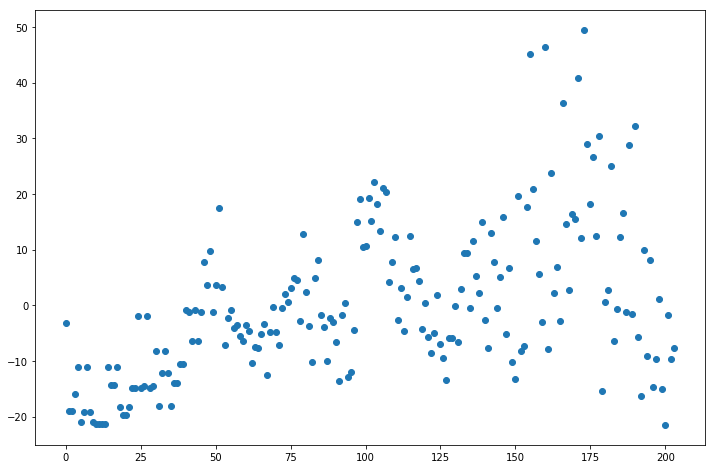

In [29]:
result4.resid.plot(style='o', figsize=(12,8))

#Show here that adding X6 (First Week End Gross (USA)) makes the result worse

In [31]:
result5 = sm.ols(formula="Y ~ X1*X5 + X4*X5 + X2*X3 + X3 + X4 + X5 + X6 + X7 + X8 ", data=model_df).fit()

In [32]:
result5.summary()

<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>            <td>Y</td>        <th>  R-squared:         </th> <td>   0.472</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.441</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   15.58</td>
</tr>
<tr>
  <th>Date:</th>             <td>Thu, 26 Apr 2018</td> <th>  Prob (F-statistic):</th> <td>1.62e-21</td>
</tr>
<tr>
  <th>Time:</th>                 <td>11:07:39</td>     <th>  Log-Likelihood:    </th> <td> -823.99</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   204</td>      <th>  AIC:               </th> <td>   1672.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   192</td>      <th>  BIC:               </th> <td>   1712.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>    11</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Intercept</th> <td>   56.5337</td> <td>   22.961</td> <td>    2.462</td> <td> 0.015</td> <td>   11.246</td> <td>  101.822</td>
</tr>
<tr>
  <th>X1</th>        <td>   -5.0685</td> <td>   13.506</td> <td>   -0.375</td> <td> 0.708</td> <td>  -31.707</td> <td>   21.570</td>
</tr>
<tr>
  <th>X5</th>        <td>    0.1373</td> <td>    0.044</td> <td>    3.124</td> <td> 0.002</td> <td>    0.051</td> <td>    0.224</td>
</tr>
<tr>
  <th>X1:X5</th>     <td>   -0.0981</td> <td>    0.069</td> <td>   -1.413</td> <td> 0.159</td> <td>   -0.235</td> <td>    0.039</td>
</tr>
<tr>
  <th>X4</th>        <td>   -0.0139</td> <td>    0.005</td> <td>   -2.759</td> <td> 0.006</td> <td>   -0.024</td> <td>   -0.004</td>
</tr>
<tr>
  <th>X4:X5</th>     <td> 1.098e-05</td> <td>  8.4e-06</td> <td>    1.308</td> <td> 0.193</td> <td>-5.58e-06</td> <td> 2.75e-05</td>
</tr>
<tr>
  <th>X2</th>        <td> -7.68e-05</td> <td> 5.46e-05</td> <td>   -1.406</td> <td> 0.161</td> <td>   -0.000</td> <td>  3.1e-05</td>
</tr>
<tr>
  <th>X3</th>        <td>   -0.3746</td> <td>    0.319</td> <td>   -1.173</td> <td> 0.242</td> <td>   -1.005</td> <td>    0.255</td>
</tr>
<tr>
  <th>X2:X3</th>     <td> 1.243e-06</td> <td> 7.14e-07</td> <td>    1.742</td> <td> 0.083</td> <td>-1.65e-07</td> <td> 2.65e-06</td>
</tr>
<tr>
  <th>X6</th>        <td>-2.493e-08</td> <td> 8.84e-08</td> <td>   -0.282</td> <td> 0.778</td> <td>-1.99e-07</td> <td> 1.49e-07</td>
</tr>
<tr>
  <th>X7</th>        <td>-1.455e-07</td> <td> 4.02e-08</td> <td>   -3.620</td> <td> 0.000</td> <td>-2.25e-07</td> <td>-6.62e-08</td>
</tr>
<tr>
  <th>X8</th>        <td> 6.082e-08</td> <td> 1.49e-08</td> <td>    4.094</td> <td> 0.000</td> <td> 3.15e-08</td> <td> 9.01e-08</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td>31.039</td> <th>  Durbin-Watson:     </th> <td>   0.973</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.000</td> <th>  Jarque-Bera (JB):  </th> <td>  41.543</td>
</tr>
<tr>
  <th>Skew:</th>          <td> 0.949</td> <th>  Prob(JB):          </th> <td>9.53e-10</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 4.132</td> <th>  Cond. No.          </th> <td>9.74e+09</td>
</tr>
</table>

# Show the Response Results - Try to improve the model

In [98]:
y = model_df['Y']

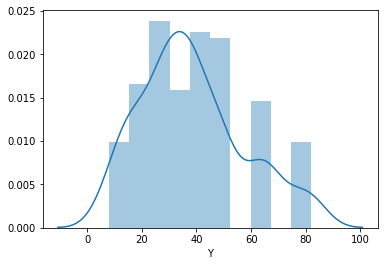

In [99]:
sns.distplot(y)

In [100]:
y_mean = model_df['Y'].mean()

In [101]:
transformed = np.abs(y - y_mean)

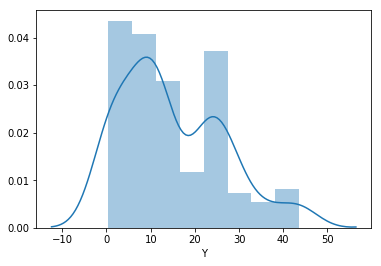

In [102]:
sns.distplot(transformed)

In [58]:
log_y = np.log(y)

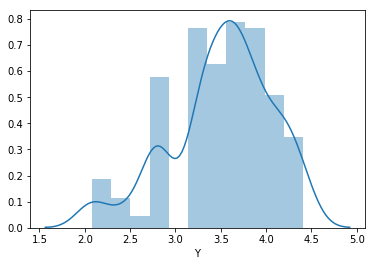

In [60]:
sns.distplot(log_y)

In [61]:
log_y_mean = np.mean(log_y)

In [62]:
log_normalized = np.abs(log_y - log_y_mean)

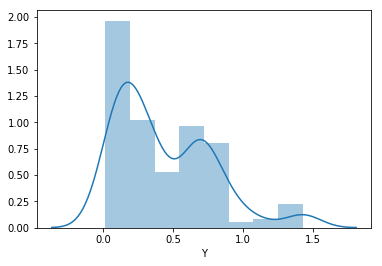

In [63]:
sns.distplot(log_normalized)

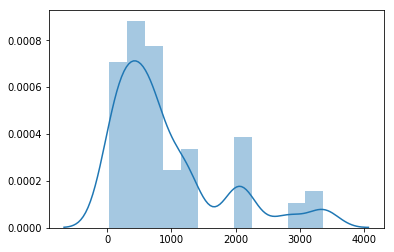

In [72]:
sns.distplot(boxcox(y,2))

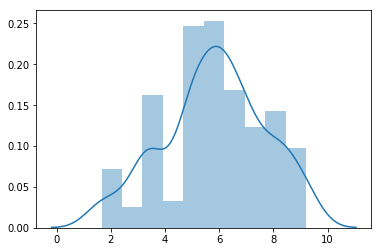

In [74]:
sns.distplot(boxcox(log_y,2))

In [75]:
bclog_transformed = boxcox(log_y,2)

In [76]:
bclog_transformed_mean = np.mean(bclog_transformed)

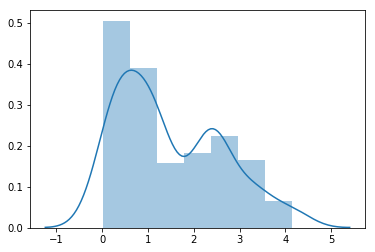

In [78]:
sns.distplot(abs(bclog_transformed -bclog_transformed_mean))

In [141]:
new_model_df = model_df[['Y','X1','X2','X3','X4','X5','X7','X8']].copy()

In [205]:
new_model_df['Y2'] = model_df['Y'].apply(lambda y:pow(y,0.75))

In [206]:
result5 = sm.ols(formula="Y2 ~ X1*X5 + X4*X5 + X2*X3 + X3 + X4 + X5 + X7 + X8", data=new_model_df).fit()

In [207]:
result5.summary()

<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>           <td>Y2</td>        <th>  R-squared:         </th> <td>   0.462</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.435</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   16.60</td>
</tr>
<tr>
  <th>Date:</th>             <td>Thu, 26 Apr 2018</td> <th>  Prob (F-statistic):</th> <td>1.87e-21</td>
</tr>
<tr>
  <th>Time:</th>                 <td>13:04:47</td>     <th>  Log-Likelihood:    </th> <td> -580.78</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   204</td>      <th>  AIC:               </th> <td>   1184.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   193</td>      <th>  BIC:               </th> <td>   1220.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>    10</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Intercept</th> <td>   21.8038</td> <td>    6.891</td> <td>    3.164</td> <td> 0.002</td> <td>    8.212</td> <td>   35.395</td>
</tr>
<tr>
  <th>X1</th>        <td>   -1.5853</td> <td>    4.025</td> <td>   -0.394</td> <td> 0.694</td> <td>   -9.524</td> <td>    6.353</td>
</tr>
<tr>
  <th>X5</th>        <td>    0.0419</td> <td>    0.013</td> <td>    3.155</td> <td> 0.002</td> <td>    0.016</td> <td>    0.068</td>
</tr>
<tr>
  <th>X1:X5</th>     <td>   -0.0301</td> <td>    0.021</td> <td>   -1.432</td> <td> 0.154</td> <td>   -0.072</td> <td>    0.011</td>
</tr>
<tr>
  <th>X4</th>        <td>   -0.0038</td> <td>    0.002</td> <td>   -2.464</td> <td> 0.015</td> <td>   -0.007</td> <td>   -0.001</td>
</tr>
<tr>
  <th>X4:X5</th>     <td> 2.572e-06</td> <td> 2.51e-06</td> <td>    1.026</td> <td> 0.306</td> <td>-2.37e-06</td> <td> 7.52e-06</td>
</tr>
<tr>
  <th>X2</th>        <td>  -2.5e-05</td> <td> 1.65e-05</td> <td>   -1.516</td> <td> 0.131</td> <td>-5.75e-05</td> <td> 7.53e-06</td>
</tr>
<tr>
  <th>X3</th>        <td>   -0.1328</td> <td>    0.096</td> <td>   -1.377</td> <td> 0.170</td> <td>   -0.323</td> <td>    0.057</td>
</tr>
<tr>
  <th>X2:X3</th>     <td> 4.032e-07</td> <td> 2.15e-07</td> <td>    1.875</td> <td> 0.062</td> <td> -2.1e-08</td> <td> 8.27e-07</td>
</tr>
<tr>
  <th>X7</th>        <td>-4.468e-08</td> <td> 1.08e-08</td> <td>   -4.126</td> <td> 0.000</td> <td> -6.6e-08</td> <td>-2.33e-08</td>
</tr>
<tr>
  <th>X8</th>        <td> 1.744e-08</td> <td> 4.28e-09</td> <td>    4.071</td> <td> 0.000</td> <td> 8.99e-09</td> <td> 2.59e-08</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td>18.727</td> <th>  Durbin-Watson:     </th> <td>   0.952</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.000</td> <th>  Jarque-Bera (JB):  </th> <td>  21.390</td>
</tr>
<tr>
  <th>Skew:</th>          <td> 0.703</td> <th>  Prob(JB):          </th> <td>2.27e-05</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 3.736</td> <th>  Cond. No.          </th> <td>9.54e+09</td>
</tr>
</table>

In [148]:
shapiro(y)

(0.9477471709251404, 9.24228800158744e-07)

In [149]:
shapiro(log_y)

(0.9491920471191406, 1.2709422207990428e-06)

In [150]:
shapiro(bclog_transformed)

(0.9702280163764954, 0.0002566314651630819)

In [151]:
shapiro(boxcox(y,2))

(0.8252118825912476, 2.1706777814014394e-14)

# Try to predict the two mode separately

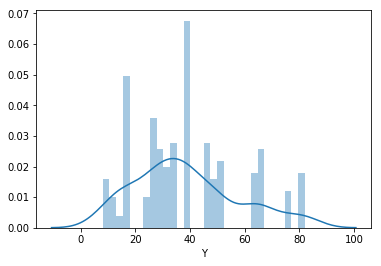

In [181]:
sns.distplot(y,bins=30)

In [158]:
split_model_1 = model_df[model_df['Y'] < 50]

In [159]:
split_model_1.count()

Y     156
X1    156
X2    156
X3    156
X4    156
X5    156
X6    156
X7    156
X8    156
dtype: int64

In [163]:
result6 = sm.ols(formula="Y ~ X1*X5 + X4*X5 + X2*X3 + X3 + X4 + X5 + X7 + X8", data=split_model_1).fit()

In [164]:
result6.summary()

<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>            <td>Y</td>        <th>  R-squared:         </th> <td>   0.383</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.340</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   8.988</td>
</tr>
<tr>
  <th>Date:</th>             <td>Thu, 26 Apr 2018</td> <th>  Prob (F-statistic):</th> <td>2.01e-11</td>
</tr>
<tr>
  <th>Time:</th>                 <td>12:50:48</td>     <th>  Log-Likelihood:    </th> <td> -562.97</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   156</td>      <th>  AIC:               </th> <td>   1148.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   145</td>      <th>  BIC:               </th> <td>   1181.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>    10</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Intercept</th> <td>   42.9249</td> <td>   17.029</td> <td>    2.521</td> <td> 0.013</td> <td>    9.268</td> <td>   76.582</td>
</tr>
<tr>
  <th>X1</th>        <td>   -1.0360</td> <td>   10.992</td> <td>   -0.094</td> <td> 0.925</td> <td>  -22.762</td> <td>   20.690</td>
</tr>
<tr>
  <th>X5</th>        <td>    0.1452</td> <td>    0.042</td> <td>    3.487</td> <td> 0.001</td> <td>    0.063</td> <td>    0.228</td>
</tr>
<tr>
  <th>X1:X5</th>     <td>   -0.1442</td> <td>    0.066</td> <td>   -2.176</td> <td> 0.031</td> <td>   -0.275</td> <td>   -0.013</td>
</tr>
<tr>
  <th>X4</th>        <td>   -0.0106</td> <td>    0.004</td> <td>   -2.370</td> <td> 0.019</td> <td>   -0.020</td> <td>   -0.002</td>
</tr>
<tr>
  <th>X4:X5</th>     <td> 1.404e-05</td> <td> 1.01e-05</td> <td>    1.383</td> <td> 0.169</td> <td>-6.02e-06</td> <td> 3.41e-05</td>
</tr>
<tr>
  <th>X2</th>        <td>-1.041e-05</td> <td> 4.62e-05</td> <td>   -0.225</td> <td> 0.822</td> <td>   -0.000</td> <td>  8.1e-05</td>
</tr>
<tr>
  <th>X3</th>        <td>   -0.2756</td> <td>    0.232</td> <td>   -1.185</td> <td> 0.238</td> <td>   -0.735</td> <td>    0.184</td>
</tr>
<tr>
  <th>X2:X3</th>     <td> 3.215e-07</td> <td> 6.11e-07</td> <td>    0.526</td> <td> 0.599</td> <td>-8.86e-07</td> <td> 1.53e-06</td>
</tr>
<tr>
  <th>X7</th>        <td>-9.611e-08</td> <td> 3.08e-08</td> <td>   -3.120</td> <td> 0.002</td> <td>-1.57e-07</td> <td>-3.52e-08</td>
</tr>
<tr>
  <th>X8</th>        <td> 4.027e-08</td> <td> 1.37e-08</td> <td>    2.945</td> <td> 0.004</td> <td> 1.32e-08</td> <td> 6.73e-08</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td> 1.226</td> <th>  Durbin-Watson:     </th> <td>   0.799</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.542</td> <th>  Jarque-Bera (JB):  </th> <td>   1.309</td>
</tr>
<tr>
  <th>Skew:</th>          <td> 0.201</td> <th>  Prob(JB):          </th> <td>   0.520</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 2.799</td> <th>  Cond. No.          </th> <td>7.38e+09</td>
</tr>
</table>

In [186]:
split_model_2 = model_df[model_df['Y'] > 20]

In [187]:
result7 = sm.ols(formula="Y ~ X1*X5 + X4*X5 + X2*X3 + X3 + X4 + X5 + X7 + X8", data=split_model_2).fit()

In [188]:
result7.summary()

<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>            <td>Y</td>        <th>  R-squared:         </th> <td>   0.433</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.396</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   11.69</td>
</tr>
<tr>
  <th>Date:</th>             <td>Thu, 26 Apr 2018</td> <th>  Prob (F-statistic):</th> <td>8.43e-15</td>
</tr>
<tr>
  <th>Time:</th>                 <td>12:56:21</td>     <th>  Log-Likelihood:    </th> <td> -642.90</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>   164</td>      <th>  AIC:               </th> <td>   1308.</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>   153</td>      <th>  BIC:               </th> <td>   1342.</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>    10</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>Intercept</th> <td>   56.9643</td> <td>   25.408</td> <td>    2.242</td> <td> 0.026</td> <td>    6.768</td> <td>  107.161</td>
</tr>
<tr>
  <th>X1</th>        <td>    1.5390</td> <td>   12.887</td> <td>    0.119</td> <td> 0.905</td> <td>  -23.920</td> <td>   26.998</td>
</tr>
<tr>
  <th>X5</th>        <td>    0.0907</td> <td>    0.040</td> <td>    2.260</td> <td> 0.025</td> <td>    0.011</td> <td>    0.170</td>
</tr>
<tr>
  <th>X1:X5</th>     <td>   -0.0591</td> <td>    0.063</td> <td>   -0.931</td> <td> 0.353</td> <td>   -0.184</td> <td>    0.066</td>
</tr>
<tr>
  <th>X4</th>        <td>   -0.0184</td> <td>    0.005</td> <td>   -3.991</td> <td> 0.000</td> <td>   -0.028</td> <td>   -0.009</td>
</tr>
<tr>
  <th>X4:X5</th>     <td> 1.953e-05</td> <td>  7.7e-06</td> <td>    2.536</td> <td> 0.012</td> <td> 4.31e-06</td> <td> 3.47e-05</td>
</tr>
<tr>
  <th>X2</th>        <td>-5.794e-05</td> <td> 5.38e-05</td> <td>   -1.077</td> <td> 0.283</td> <td>   -0.000</td> <td> 4.83e-05</td>
</tr>
<tr>
  <th>X3</th>        <td>   -0.2973</td> <td>    0.359</td> <td>   -0.828</td> <td> 0.409</td> <td>   -1.006</td> <td>    0.412</td>
</tr>
<tr>
  <th>X2:X3</th>     <td> 9.042e-07</td> <td> 7.06e-07</td> <td>    1.281</td> <td> 0.202</td> <td> -4.9e-07</td> <td>  2.3e-06</td>
</tr>
<tr>
  <th>X7</th>        <td>-1.078e-07</td> <td> 3.45e-08</td> <td>   -3.127</td> <td> 0.002</td> <td>-1.76e-07</td> <td>-3.97e-08</td>
</tr>
<tr>
  <th>X8</th>        <td> 4.338e-08</td> <td> 1.33e-08</td> <td>    3.267</td> <td> 0.001</td> <td> 1.71e-08</td> <td> 6.96e-08</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td>27.371</td> <th>  Durbin-Watson:     </th> <td>   0.893</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.000</td> <th>  Jarque-Bera (JB):  </th> <td>  35.070</td>
</tr>
<tr>
  <th>Skew:</th>          <td> 1.062</td> <th>  Prob(JB):          </th> <td>2.42e-08</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 3.791</td> <th>  Cond. No.          </th> <td>1.17e+10</td>
</tr>
</table>

# Let's save the best model

In [209]:
best_model_df = model_df[['Y','X3','X4','X5','X7','X8']].copy()

In [213]:
best_model_df['X1*X5'] = model_df.X1 * model_df.X5

In [214]:
best_model_df['X2*X3'] = model_df.X2 * model_df.X3

In [215]:
best_model_df['X4*X5'] = model_df.X4 * model_df.X5

In [217]:
best_model_df.head()

,Y,X3,X4,X5,X7,X8,X1*X5,X2*X3,X4*X5
0,17,86.0,517.0,176.0,134218018.0,166200000.0,128.48,12050062.0,90992.0
1,11,68.5,260.0,106.0,27107960.0,27107960.0,68.90,2920497.5,27560.0
2,11,68.5,260.0,106.0,27107960.0,27107960.0,68.90,2920497.5,27560.0
3,11,68.5,16.0,10.0,15934737.0,15934737.0,6.10,78021.5,160.0
4,8,87.0,277.0,127.0,108185706.0,108185706.0,86.36,7443111.0,35179.0


In [218]:
best_model_df.to_csv(os.path.join('data','best_linear_regression_model'))